<a href="https://colab.research.google.com/github/ReidelVichot/PUS2022_Heat-TreesPHL/blob/main/Models12_2_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook runs the models for the Heat and Trees project. The notebook uses data that has been previously cleanned in another notbook named cleaning with the most current date. The notebook requires access to the google drive in order to get the clean CSVs. 

In [8]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#connecting to the google drive and getting the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Files from the drive
ct_tree_file = "/content/drive/MyDrive/Colab Notebooks/ct_trees.csv"
heat_file = "/content/drive/MyDrive/Colab Notebooks/heat.csv"

In [4]:
ct_tree = pd.read_csv(ct_tree_file)
heat = pd.read_csv(heat_file)

In [5]:
ct_tree

,geoid,num_trees,ave_dbh
0,NaN,6983,13.715065
1,4.210100e+10,1060,9.975472
2,4.210100e+10,252,9.106000
3,4.210100e+10,1086,8.928177
4,4.210100e+10,253,6.106719
...,...,...,...
370,4.210104e+10,463,16.328294
371,4.210104e+10,310,21.890323
372,4.210198e+10,8177,16.799621
373,4.210198e+10,1033,21.674103


In [6]:
heat

,Unnamed: 0,GEOID10,HVI_SCORE,geometry,num_trees,ave_dbh
0,0,42101019000,0.935255,"POLYGON ((-75.0949037530549 40.0104860796399, ...",192,14.661458
1,1,42101019100,2.963969,"POLYGON ((-75.1071537566382 40.0167360797785, ...",430,19.905750
2,2,42101019200,2.676547,"POLYGON ((-75.1075956511127 39.9996716549479, ...",320,10.568750
3,3,42101019700,3.156173,"POLYGON ((-75.1358598309214 40.0119913037377, ...",195,14.174359
4,4,42101019800,2.885302,"POLYGON ((-75.1367161109815 40.0080297688381, ...",188,14.486631
...,...,...,...,...,...,...
369,369,42101036203,-1.626316,"POLYGON ((-74.9648847150604 40.0772810971776, ...",291,13.536082
370,370,42101035302,-0.934188,"POLYGON ((-74.9875706652257 40.0758346996955, ...",168,1.476190
371,371,42101036201,-1.094011,"POLYGON ((-74.9849887222353 40.0745340963154, ...",161,15.776398
372,372,42101036302,-1.194634,"POLYGON ((-74.9798960441206 40.0938200532625, ...",76,17.210526


In [7]:
heat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  374 non-null    int64  
 1   GEOID10     374 non-null    int64  
 2   HVI_SCORE   374 non-null    float64
 3   geometry    374 non-null    object 
 4   num_trees   374 non-null    int64  
 5   ave_dbh     374 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 17.7+ KB


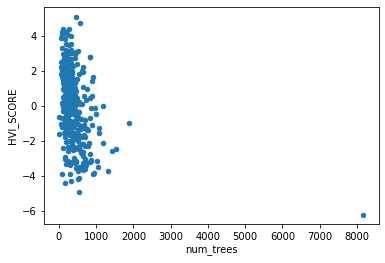

In [10]:
ax = heat.plot("num_trees", "HVI_SCORE", kind="scatter")
ax.set_xlabel("num_trees");

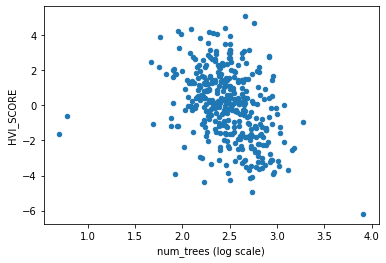

In [13]:
import numpy as np

heat["log_num_trees"] = np.log10(heat.num_trees)
ax = heat.plot("log_num_trees", "HVI_SCORE", kind="scatter")
ax.set_xlabel("num_trees (log scale)");

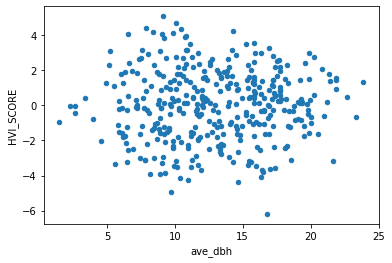

In [15]:
ax = heat.plot("ave_dbh", "HVI_SCORE", kind="scatter")
ax.set_xlabel("ave_dbh");

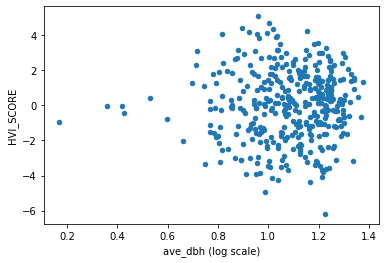

In [16]:
heat["log_ave_dbh"] = np.log10(heat.ave_dbh)
ax = heat.plot("log_ave_dbh", "HVI_SCORE", kind="scatter")
ax.set_xlabel("ave_dbh (log scale)");

In [ ]:
heat["dbh_trees"] = heat["ave_dbh"] * heat["num_trees"]
heat

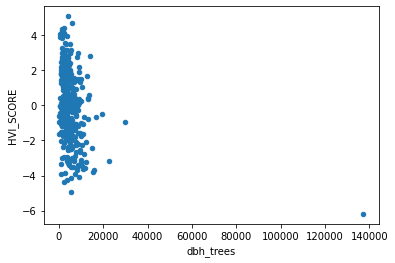

In [22]:
ax = heat.plot("dbh_trees", "HVI_SCORE", kind="scatter")
ax.set_xlabel("dbh_trees");

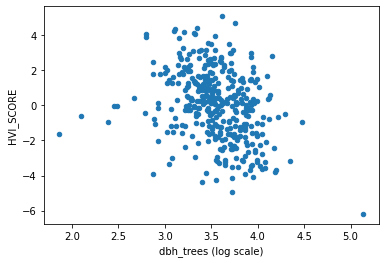

In [23]:
heat["log_dbh_trees"] = np.log10(heat.dbh_trees)
ax = heat.plot("log_dbh_trees", "HVI_SCORE", kind="scatter")
ax.set_xlabel("dbh_trees (log scale)");

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


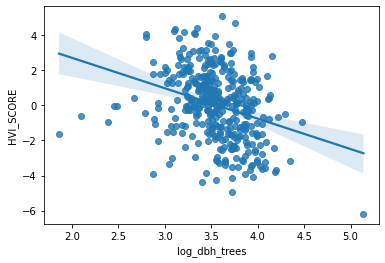

In [26]:
import seaborn as sns
sns.regplot(heat['log_dbh_trees'], heat['HVI_SCORE']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


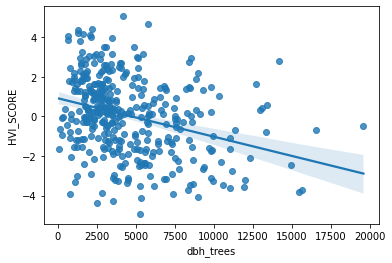

In [34]:
import seaborn as sns
new = heat[heat['dbh_trees']<20000]

sns.regplot(new["dbh_trees"], new['HVI_SCORE']);